# Working notebook for ALAN project as of December 5, 2023

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

import geopandas as gpd
import rasterio
import statsmodels.api as sm
from shapely.geometry import Point
from scipy import stats

## Import FAA Bird Strike Database. Provide descriptive statistics

In [3]:
df = pd.read_csv('/Users/joeypaulelihaynes/ALAN/MSAccess/NWSD/STRIKE_REPORTS.csv', low_memory=False)

# Print the first 25 rows.
df.head(25)

INDEX_NR       INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR   TIME  \
0     608242   6/22/1996 0:00:00               6           1996    NaN   
1     608243   6/26/1996 0:00:00               6           1996    NaN   
2     608244    7/1/1996 0:00:00               7           1996    NaN   
3     608245    7/1/1996 0:00:00               7           1996    NaN   
4     608246    7/1/1996 0:00:00               7           1996    NaN   
5     608247    5/6/1991 0:00:00               5           1991    NaN   
6     608248   11/5/1993 0:00:00              11           1993    NaN   
7     608249    7/2/1995 0:00:00               7           1995    NaN   
8     608250   9/19/1990 0:00:00               9           1990    NaN   
9     608251    5/3/1992 0:00:00               5           1992    NaN   
10    608253    8/7/1990 0:00:00               8           1990  20:25   
11    608254    9/7/1990 0:00:00               9           1990    NaN   
12    608255   4/14/1995 0:00:00               4           1995    NaN   
13    608256   12/8/1993 0:00:00              12           1993    NaN   
14    608257    9/1/1994 0:00:00               9           1994    NaN   
15    608258   9/17/1990 0:00:00               9           1990    NaN   
16    608259   7/13/1990 0:00:00               7           1990    NaN   
17    608260   3/28/1991 0:00:00               3           1991    NaN   
18    608261   4/28/1995 0:00:00               4           1995    NaN   
19    608262   5/25/1990 0:00:00               5           1990    NaN   
20    608263    2/5/1991 0:00:00               2           1991    NaN   
21    608265  11/25/1991 0:00:00              11           1991    NaN   
22    608266   10/9/1990 0:00:00              10           1990    NaN   
23    608267   9/10/1990 0:00:00               9           1990    NaN   
24    608268  10/18/1991 0:00:00              10           1991    NaN   

   TIME_OF_DAY AIRPORT_ID                              AIRPORT  LATITUDE  \
0          NaN       KSMF                      SACRAMENTO INTL  38.69542   
1          NaN       KDEN                  DENVER INTL AIRPORT  39.85841   
2          NaN       KOMA                      EPPLEY AIRFIELD  41.30252   
3          NaN       KIAD          WASHINGTON DULLES INTL ARPT  38.94453   
4          NaN       KLGA                      LA GUARDIA ARPT  40.77724   
5          Day       KSAT                     SAN ANTONIO INTL  29.53369   
6         Dawn       KMCI                     KANSAS CITY INTL  39.29761   
7          NaN       KMCI                     KANSAS CITY INTL  39.29761   
8          Day       KDFW          DALLAS/FORT WORTH INTL ARPT  32.89595   
9          Day       KSJC  NORMAN Y. MINETA SAN JOSE INTL ARPT  37.36186   
10       Night       KSTL                LAMBERT-ST LOUIS INTL  38.74769   
11         Day       KAGS    AUGUSTA REGIONAL ARPT AT BUSH FLD  33.36996   
12         Day       KAEX                      ALEXANDRIA INTL  31.32737   
13         Day       KDFW          DALLAS/FORT WORTH INTL ARPT  32.89595   
14        Dawn       KSYR                SYRACUSE HANCOCK INTL  43.11119   
15        Dawn       KPTK                  OAKLAND COUNTY INTL  42.66520   
16         Day       KLAX                     LOS ANGELES INTL  33.94254   
17         Day       KHOU                 WILLIAM P HOBBY ARPT  29.64542   
18         NaN       KSFO              SAN FRANCISCO INTL ARPT  37.61900   
19         Day       KMDW             CHICAGO MIDWAY INTL ARPT  41.78598   
20        Dusk       KSMF                      SACRAMENTO INTL  38.69542   
21         NaN       KHUF   TERRE HAUTE INTL ARPT-HULMAN FIELD  39.45146   
22         Day       KBUF                 BUFFALO-NIAGARA INTL  42.94052   
23       Night       KLGA                      LA GUARDIA ARPT  40.77724   
24         Day      KDEN*                DENVER STAPLETON ARPT  39.85840   

    LONGITUDE  ...    SIZE NR_INJURIES NR_FATALITIES  \
0  -121.59077  ...  Medium         NaN        

In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286528 entries, 0 to 286527
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               286528 non-null  int64  
 1   INCIDENT_DATE          286528 non-null  object 
 2   INCIDENT_MONTH         286528 non-null  int64  
 3   INCIDENT_YEAR          286528 non-null  int64  
 4   TIME                   161507 non-null  object 
 5   TIME_OF_DAY            165248 non-null  object 
 6   AIRPORT_ID             286525 non-null  object 
 7   AIRPORT                286528 non-null  object 
 8   LATITUDE               251248 non-null  float64
 9   LONGITUDE              251247 non-null  float64
 10  RUNWAY                 217089 non-null  object 
 11  STATE                  251248 non-null  object 
 12  FAAREGION              251248 non-null  object 
 13  LOCATION               33736 non-null   object 
 14  ENROUTE_STATE          5022 non-nul

In [83]:
df.describe()

INDEX_NR  INCIDENT_MONTH  INCIDENT_YEAR      LATITUDE  \
count  2.865280e+05   286528.000000  286528.000000  2.512480e+05   
mean   8.677197e+05        7.170612    2011.613905  2.026246e+02   
std    2.465197e+05        2.774460       8.406901  8.210994e+04   
min    6.082420e+05        1.000000    1990.000000 -3.767333e+01   
25%    6.887068e+05        5.000000    2006.000000  3.303915e+01   
50%    7.634075e+05        7.000000    2013.000000  3.880581e+01   
75%    1.060862e+06        9.000000    2018.000000  4.085010e+01   
max    1.459351e+06       12.000000    2023.000000  4.115443e+07   

           LONGITUDE            EMA            EMO        AC_MASS  \
count  251247.000000  190815.000000  185607.000000  205029.000000   
mean      -90.878678      19.779153       8.528051       3.527330   
std       328.577698      10.732167      11.734294       0.885284   
min      -177.381000       0.000000       0.000000       1.000000   
25%       -98.568198      10.000000       1.000000       3.000000   
50%       -87.904460      22.000000       4.000000       4.000000   
75%       -80.417940      31.000000      10.000000       4.000000   
max    164140.000000      92.000000      97.000000       5.000000   

            NUM_ENGS      ENG_1_POS  ...      STR_LGHTS      DAM_LGHTS  \
count  204800.000000  204026.000000  ...  286528.000000  286528.000000   
mean        2.014448       2.819082  ...       0.004977       0.003406   
std         0.420835       2.113776  ...       0.070371       0.058264   
min         1.000000       1.000000  ...       0.000000       0.000000   
25%         2.000000       1.000000  ...       0.000000       0.000000   
50%         2.000000       1.000000  ...       0.000000       0.000000   
75%         2.000000       5.000000  ...       0.000000       0.000000   
max         4.000000       7.000000  ...       1.000000       1.000000   

           STR_OTHER      DAM_OTHER  BIRD_BAND_NUMBER  REMAINS_COLLECTED  \
count  286528.000000  286528.000000      3.850000e+02      286528.000000   
mean        0.132057       0.008139      8.970923e+07           0.515967   
std         0.338553       0.089848      9.112696e+07           0.499746   
min         0.000000       0.000000      0.000000e+00           0.000000   
25%         0.000000       0.000000      0.000000e+00           0.000000   
50%         0.000000       0.000000      9.281278e+07           1.000000   
75%         0.000000       0.000000      1.893408e+08           1.000000   
max         1.000000       1.000000      2.821218e+08           1.000000   

        REMAINS_SENT  NR_INJURIES  NR_FATALITIES  TRANSFER  
count  286528.000000   276.000000      24.000000  286528.0  
mean        0.158965     1.293478       2.041667       0.0  
std         0.365644     0.756134       1.654484       0.0  
min         0.000000     1.000000       1.000000       0.0  
25%         0.000000     1.000000       1.000000       0.0  
50%         0.000000     1.000000       1.500000       0.0  
75%         0.000000     1.000000       2.000000       0.0  
max         1.000000     7.000000       8.000000       0.0  

[8 rows x 57 columns]

## Data Cleaning

In [11]:
df.shape

(286528, 100)

In [12]:
# Check for duplicates
# Diminsions of the database remain the same after dropping duplicates, indicating that none were found
df.drop_duplicates().shape

(286528, 100)

In [13]:
df.isna().sum()

INDEX_NR               0
INCIDENT_DATE          0
INCIDENT_MONTH         0
INCIDENT_YEAR          0
TIME              125021
                   ...  
REPORTED_TITLE         0
SOURCE                 0
PERSON             21139
LUPDATE                0
TRANSFER               0
Length: 100, dtype: int64

In [14]:
# Missing values
mask = df.isna()
mask.tail()

INDEX_NR  INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR   TIME  \
286523     False          False           False          False  False   
286524     False          False           False          False  False   
286525     False          False           False          False  False   
286526     False          False           False          False   True   
286527     False          False           False          False   True   

        TIME_OF_DAY  AIRPORT_ID  AIRPORT  LATITUDE  LONGITUDE  ...   SIZE  \
286523         True       False    False     False      False  ...   True   
286524        False       False    False     False      False  ...  False   
286525        False       False    False     False      False  ...  False   
286526         True       False    False     False      False  ...   True   
286527        False       False    False     False      False  ...  False   

        NR_INJURIES  NR_FATALITIES  COMMENTS  REPORTED_NAME  REPORTED_TITLE  \
286523         True           True      True          False           False   
286524         True           True     False          False           False   
286525         True           True     False          False           False   
286526         True           True     False          False           False   
286527         True           True     False          False           False   

        SOURCE  PERSON  LUPDATE  TRANSFER  
286523   False   False    False     False  
286524   False   False    False     False  
286525   False    True    False     False  
286526   False   False    False     False  
286527   False    True    False     False  

[5 rows x 100 columns]

In [15]:
# Convert date to datetime object
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'])

## Descriptive statistics / visualizations

In [4]:
# Mean incident year
df['INCIDENT_YEAR'].mean()

2011.6139050982802

In [5]:
df['INCIDENT_YEAR'].median()

2013.0

In [88]:
# Latest incident year
df['INCIDENT_YEAR'].max()

2023

In [89]:
# Earliest incident year
df['INCIDENT_YEAR'].min()

1990

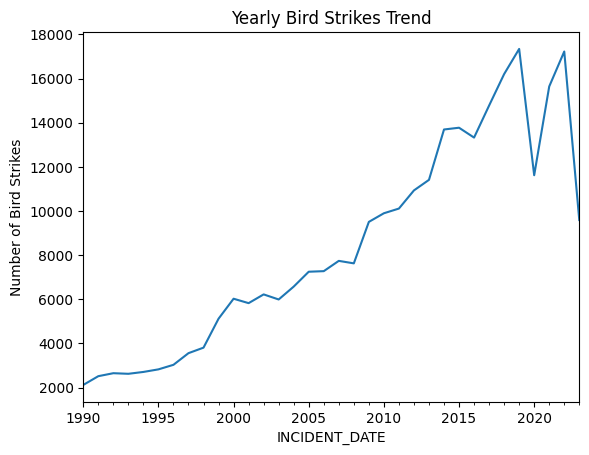

In [90]:
# Trend analysis (yearly bird strikes)
df.set_index('INCIDENT_DATE', inplace=True)
df.resample('Y').size().plot(title='Yearly Bird Strikes Trend')
plt.ylabel('Number of Bird Strikes')
plt.show()

<Axes: title={'center': 'Bird Strikes by Time of Day'}, xlabel='TIME_OF_DAY'>

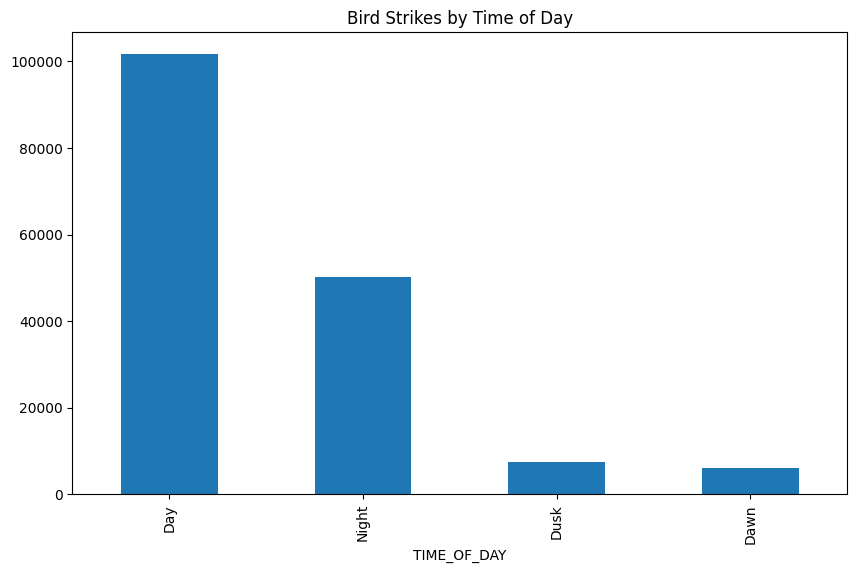

In [24]:
# Common times of day for bird strikes
plt.figure(figsize=(10, 6))
df['TIME_OF_DAY'].value_counts().plot(kind='bar', title='Bird Strikes by Time of Day')

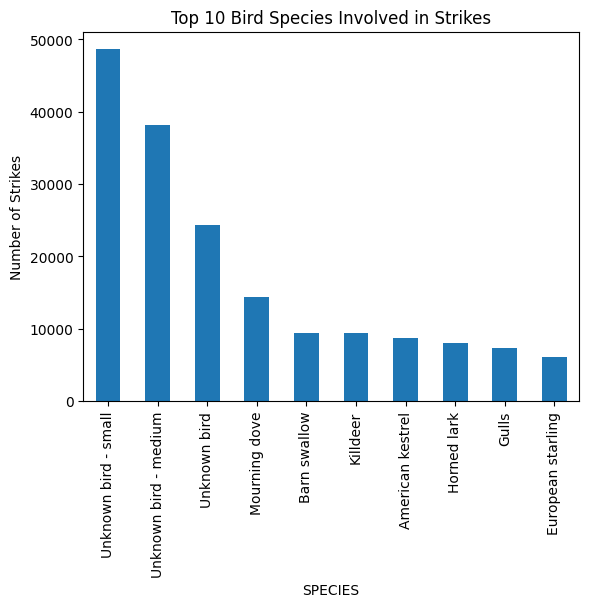

In [25]:
# Species Analysis (Bird Species Involved)
df['SPECIES'].value_counts().head(10).plot(kind='bar', title='Top 10 Bird Species Involved in Strikes')
plt.ylabel('Number of Strikes')
plt.show()

### Visualize bird strikes by location

In [6]:
# Filter, such that only strikes that are known to have occured at night are selected
# night_df = df[df['TIME_OF_DAY'] == 'Night']

# Group by latitude and longitude, and count the number of strikes
grouped_data = df.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='NUMBER_OF_STRIKES')

# Display the first few rows of the new dataframe
print(grouped_data.head())

    LATITUDE   LONGITUDE  NUMBER_OF_STRIKES
0 -37.673333  144.843333                  1
1 -37.008056  174.791667                  5
2 -34.838417  -56.030806                 12
3 -34.822222  -58.535833                 72
4 -34.559175  -58.415606                  2


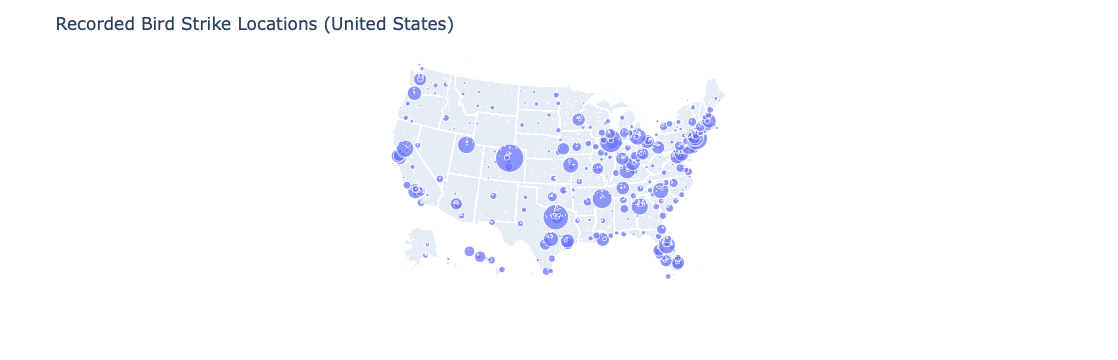

In [7]:
# Plot
fig = px.scatter_geo(grouped_data[grouped_data.NUMBER_OF_STRIKES>=1],  # Input Pandas DataFrame
                    lat="LATITUDE",  # DataFrame column with latitude
                    lon="LONGITUDE",  # DataFrame column with latitude
                    size="NUMBER_OF_STRIKES") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Recorded Bird Strike Locations (United States)',
    geo_scope='usa',
)

fig.show()

/Users/joeypaulelihaynes/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



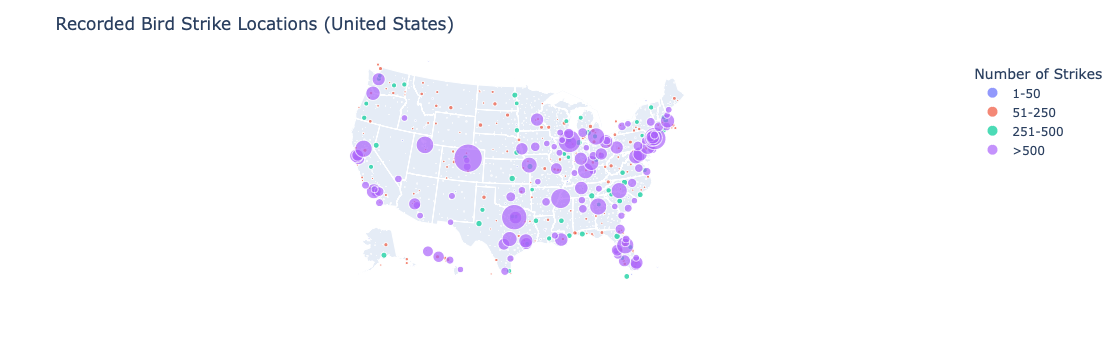

In [8]:
# Updated plot with color legend

# Create a categorical column based on 'NUMBER_OF_STRIKES'
grouped_data['STRIKE_CATEGORY'] = pd.cut(grouped_data['NUMBER_OF_STRIKES'], 
                                         bins=[0, 50, 250, 500, float('inf')], 
                                         labels=['1-50', '51-250', '251-500', '>500'])

# Plot
fig = px.scatter_geo(grouped_data[grouped_data.NUMBER_OF_STRIKES>=1],
                     lat="LATITUDE",
                     lon="LONGITUDE",
                     size="NUMBER_OF_STRIKES",
                     color="STRIKE_CATEGORY") # Use the new categorical column

fig.update_layout(
    title_text = 'Recorded Bird Strike Locations (United States)',
    geo_scope='usa',
    legend_title_text='Number of Strikes'
)

fig.show()

## Integrate GIS light pollution map

### Data cleaning

In [144]:
# Import work from QGIS. New dataframe now includes light pollution level at each point (range 0 to 14)
light_bird_df = pd.read_csv('/Users/joeypaulelihaynes/ALAN/Data/bird_strikes_plus_light_pollution.csv')

In [145]:
light_bird_df.head(25)

LATITUDE   LONGITUDE  NUMBER_OF_STRIKES  LIGHT_POLLUTION_LEVEL
0   71.285450 -156.766000                 18                      9
1   70.325000 -149.591800                  6                     11
2   70.194760 -148.465160                 11                     10
3   70.209950 -151.005560                  1                      6
4   69.371113 -152.134983                  1                      0
5   66.884680 -162.598550                 43                      6
6   66.828530 -161.027790                  1                      3
7   66.600130 -159.985750                  1                      4
8   65.758611 -168.953056                  1                      0
9   65.697560 -156.351140                  1                      4
10  64.997560 -150.644130                  1                      2
11  64.837612 -147.614492                  1                     13
12  64.813680 -147.859670                209                     11
13  64.814028 -147.918556                  2                     10
14  64.736180 -156.937420                  4                      4
15  64.512200 -165.445250                  7                      5
16  63.766611 -171.732778                  1                      0
17  62.785190 -164.491050                  3                      3
18  62.320500 -150.093690                  1                      3
19  61.845330 -165.571300                  2                      2
20  61.586300 -149.138800                  2                     11
21  61.541481 -149.460681                  1                     10
22  61.500000 -149.500000                  8                      1
23  61.169800 -151.039700                  1                      5
24  61.174320 -149.996190                433                     12

In [146]:
"""
NOTE: The original dataset contains a light pollution column (derived from the color band of the GIS light pollution map) with values 
ranging from 0 to 14. Higher values indicate a greater amount of light pollution except for '1', which indicates the highest level of 
light pollution. This function transforms these values so that they follow a logical order, with higher values consistently representing 
higher levels of light pollution.
"""

def transform_light_pollution(value):
    # Assuming 1 is the highest pollution level, map it to a higher value
    if value == 1:
        value = 15

    # The value of 0 now takes the place of 1 to ensure values are equally spaced
    if value == 0:
        value = 1

    # Set value range back to 0-14
    value -= 1
    
    return value

# Apply the transform function to the light pollution column
light_bird_df['LIGHT_POLLUTION_LEVEL'] = light_bird_df['LIGHT_POLLUTION_LEVEL'].apply(transform_light_pollution)

In [147]:
light_bird_df.head(25)

LATITUDE   LONGITUDE  NUMBER_OF_STRIKES  LIGHT_POLLUTION_LEVEL
0   71.285450 -156.766000                 18                      8
1   70.325000 -149.591800                  6                     10
2   70.194760 -148.465160                 11                      9
3   70.209950 -151.005560                  1                      5
4   69.371113 -152.134983                  1                      0
5   66.884680 -162.598550                 43                      5
6   66.828530 -161.027790                  1                      2
7   66.600130 -159.985750                  1                      3
8   65.758611 -168.953056                  1                      0
9   65.697560 -156.351140                  1                      3
10  64.997560 -150.644130                  1                      1
11  64.837612 -147.614492                  1                     12
12  64.813680 -147.859670                209                     10
13  64.814028 -147.918556                  2                      9
14  64.736180 -156.937420                  4                      3
15  64.512200 -165.445250                  7                      4
16  63.766611 -171.732778                  1                      0
17  62.785190 -164.491050                  3                      2
18  62.320500 -150.093690                  1                      2
19  61.845330 -165.571300                  2                      1
20  61.586300 -149.138800                  2                     10
21  61.541481 -149.460681                  1                      9
22  61.500000 -149.500000                  8                     14
23  61.169800 -151.039700                  1                      4
24  61.174320 -149.996190                433                     11

In [148]:
light_bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LATITUDE               2376 non-null   float64
 1   LONGITUDE              2376 non-null   float64
 2   NUMBER_OF_STRIKES      2376 non-null   int64  
 3   LIGHT_POLLUTION_LEVEL  2376 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 74.4 KB


In [173]:
light_bird_df.shape

(2376, 5)

In [168]:
# Export
light_bird_df.to_csv('clean_light_bird_df.csv', index=False)

### Statistics with integrated dataset

In [169]:
# Import cleaned dataset from earlier step
clean_light_bird_df = pd.read_csv('/Users/joeypaulelihaynes/ALAN/Data/clean_light_bird_df.csv')

In [170]:
clean_light_bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LATITUDE               2376 non-null   float64
 1   LONGITUDE              2376 non-null   float64
 2   NUMBER_OF_STRIKES      2376 non-null   int64  
 3   LIGHT_POLLUTION_LEVEL  2376 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 74.4 KB


In [175]:
clean_light_bird_df.shape

(2376, 4)

In [241]:
kendall_corr, kendall_p_value = stats.kendalltau(clean_light_bird_df['LIGHT_POLLUTION_LEVEL'], clean_light_bird_df['NUMBER_OF_STRIKES'])
print("Kendall's Tau Correlation Coefficient:", kendall_corr, "P-value:", kendall_p_value)

Kendall's Tau Correlation Coefficient: 0.3271228435972264 P-value: 1.1790179229816225e-102


In [242]:
# Spearman correlation
spearman_corr, spearman_p_value = spearmanr(clean_light_bird_df['LIGHT_POLLUTION_LEVEL'], clean_light_bird_df['NUMBER_OF_STRIKES'])
print("Spearman Correlation Coefficient:", spearman_corr, "P-value:", spearman_p_value)

Spearman Correlation Coefficient: 0.42288309466675844 P-value: 1.0449318566637668e-103


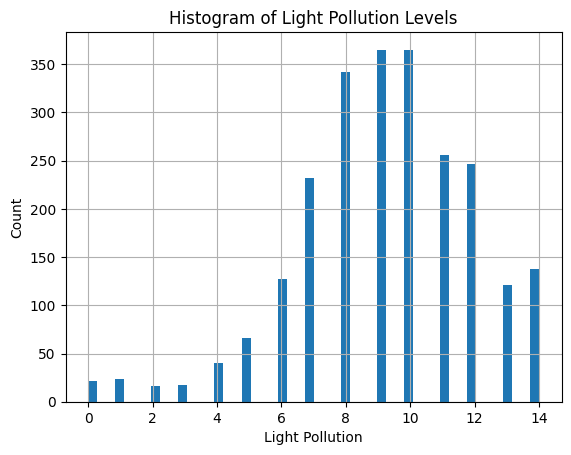

In [243]:
# Histogram of light pollution levels
clean_light_bird_df['LIGHT_POLLUTION_LEVEL'].hist(bins=50)
plt.title('Histogram of Light Pollution Levels')
plt.xlabel('Light Pollution')
plt.ylabel('Count')
plt.show()

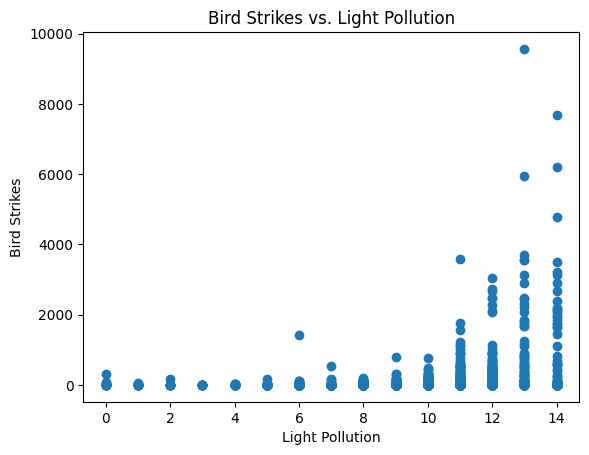

In [239]:
# Scatter plot of bird strikes vs. light pollution
plt.scatter(clean_light_bird_df['LIGHT_POLLUTION_LEVEL'], clean_light_bird_df['NUMBER_OF_STRIKES'])
plt.title('Bird Strikes vs. Light Pollution')
plt.xlabel('Light Pollution')
plt.ylabel('Bird Strikes')
plt.show()

### Does light pollution follow a Gaussian distribution? Does empirical rule apply?

In [254]:
mean_light_pollution = clean_light_bird_df['LIGHT_POLLUTION_LEVEL'].mean()
std_light_pollution = clean_light_bird_df['LIGHT_POLLUTION_LEVEL'].std()

# Display the actual percentage of data that falls within 1 standard deviation of the mean.
lower_limit = mean_light_pollution - 1 * std_light_pollution
upper_limit = mean_light_pollution + 1 * std_light_pollution
((clean_light_bird_df['LIGHT_POLLUTION_LEVEL'] >= lower_limit) & (clean_light_bird_df['LIGHT_POLLUTION_LEVEL'] <= upper_limit)).mean()

0.6565656565656566

In [255]:
# Display the percentage of data that falls within 2 standard deviations of the mean.
lower_limit = mean_light_pollution - 2 * std_light_pollution
upper_limit = mean_light_pollution + 2 * std_light_pollution
((clean_light_bird_df['LIGHT_POLLUTION_LEVEL'] >= lower_limit) & (clean_light_bird_df['LIGHT_POLLUTION_LEVEL'] <= upper_limit)).mean()

0.9671717171717171

In [256]:
# Display the percentage of data that falls within 3 standard deviations of the mean.
lower_limit = mean_light_pollution - 3 * std_light_pollution
upper_limit = mean_light_pollution + 3 * std_light_pollution
((clean_light_bird_df['LIGHT_POLLUTION_LEVEL'] >= lower_limit) & (clean_light_bird_df['LIGHT_POLLUTION_LEVEL'] <= upper_limit)).mean()

0.9911616161616161

In [257]:
# Use z-score to find outliers
clean_light_bird_df['Z_SCORE'] = stats.zscore(clean_light_bird_df['LIGHT_POLLUTION_LEVEL'])

# Display data where `LIGHT_POLLUTION_LEVEL' is above or below 3 standard deviations of the mean
clean_light_bird_df[(clean_light_bird_df['Z_SCORE'] > 3) | (clean_light_bird_df['Z_SCORE'] < -3)]

LATITUDE   LONGITUDE  NUMBER_OF_STRIKES  LIGHT_POLLUTION_LEVEL  Z_SCORE
4     69.371113 -152.134983                  1                      0 -3.35598
8     65.758611 -168.953056                  1                      0 -3.35598
16    63.766611 -171.732778                  1                      0 -3.35598
48    59.348259 -151.831539                  1                      0 -3.35598
52    58.424380 -135.707380                  8                      0 -3.35598
63    57.567060 -154.450370                  1                      0 -3.35598
64    56.577353 -169.663736                  2                      0 -3.35598
78    51.877964 -176.646031                  2                      0 -3.35598
617   44.493430 -119.843690                  1                      0 -3.35598
2364  13.483450 -144.795980                313                      0 -3.35598
2365  14.331020 -170.710530                 47                      0 -3.35598
2366  16.725000 -169.534500                  5                      0 -3.35598
2367  28.201400 -177.381000                 93                      0 -3.35598
2368  55.205600 -162.724260                 14                      0 -3.35598
2369  56.959430 -158.631820                  1                      0 -3.35598
2370  58.842300 -158.545230                  1                      0 -3.35598
2371  59.755578 -154.917752                  1                      0 -3.35598
2372  60.213671 -162.043893                  1                      0 -3.35598
2373  60.471111 -164.700833                  1                      0 -3.35598
2374  61.091700 -155.571200                  1                      0 -3.35598
2375  61.581597 -159.543043                  2                      0 -3.35598

### Outliers

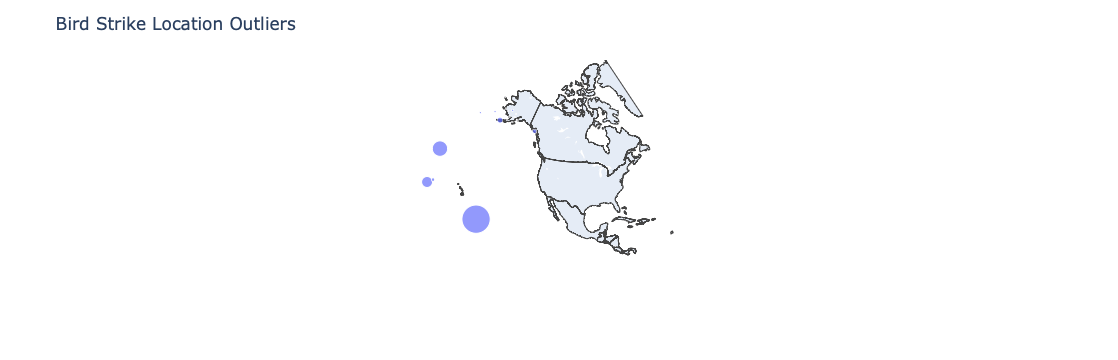

In [258]:
# New dataframe of outliers where `LIGHT_POLLUTION_LEVEL' is above or below 3 standard deviations of the mean
light_bird_df_outliers = clean_light_bird_df[(clean_light_bird_df['Z_SCORE'] > 3) | (clean_light_bird_df['Z_SCORE'] < -3)]

# Plot outliers
fig = px.scatter_geo(light_bird_df_outliers[light_bird_df_outliers.NUMBER_OF_STRIKES>=1],  # Input Pandas DataFrame
                    lat="LATITUDE",  # DataFrame column with latitude
                    lon="LONGITUDE",  # DataFrame column with latitude
                    size="NUMBER_OF_STRIKES") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Bird Strike Location Outliers',
    geo_scope='north america',
)

fig.show()

In [227]:
print("Mean # of strikes: " + str(clean_light_bird_df['NUMBER_OF_STRIKES'].mean()))
print("Median # of strikes: " + str(clean_light_bird_df['NUMBER_OF_STRIKES'].median()))

Mean # of strikes: 104.56186868686869
Median # of strikes: 3.0


In [226]:
print("Mean light pollution level: " + str(clean_light_bird_df['LIGHT_POLLUTION_LEVEL'].mean()))
print("Median light pollution level: " + str(clean_light_bird_df['LIGHT_POLLUTION_LEVEL'].median()))

Mean light pollution level: 9.228535353535353
Median light pollution level: 9.0


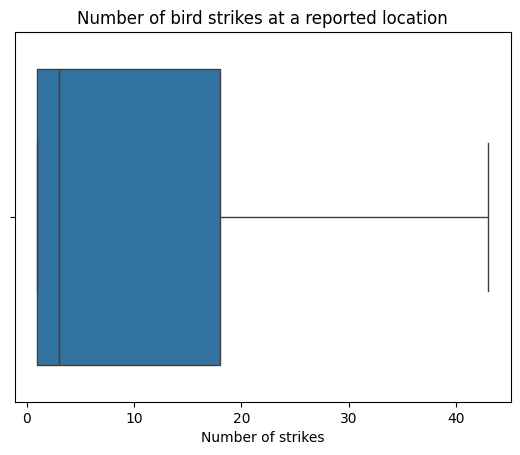

In [228]:
# Boxplot
box = sns.boxplot(x=clean_light_bird_df['NUMBER_OF_STRIKES'], showfliers=False)
g = plt.gca()
#box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Number of bird strikes at a reported location');

In [229]:
# Calculate 25th percentile of the number of strikes at a location
percentile25 = clean_light_bird_df['NUMBER_OF_STRIKES'].quantile(0.25)

# Calculate 75th percentile of the number of strikes at a location
percentile75 = clean_light_bird_df['NUMBER_OF_STRIKES'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# New dataframe only outliers
light_bird_df_outliers = clean_light_bird_df[clean_light_bird_df['NUMBER_OF_STRIKES'] > upper_limit]

# New dataframe without outliers
mask = (clean_light_bird_df['NUMBER_OF_STRIKES'] >= lower_limit) & (clean_light_bird_df['NUMBER_OF_STRIKES'] <=
upper_limit)

light_bird_df_without_outliers = light_bird_df[mask].copy()

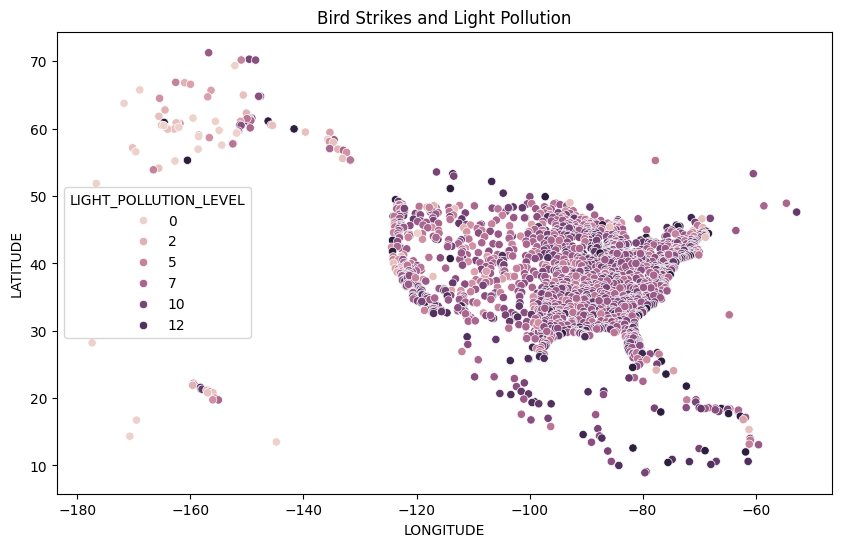

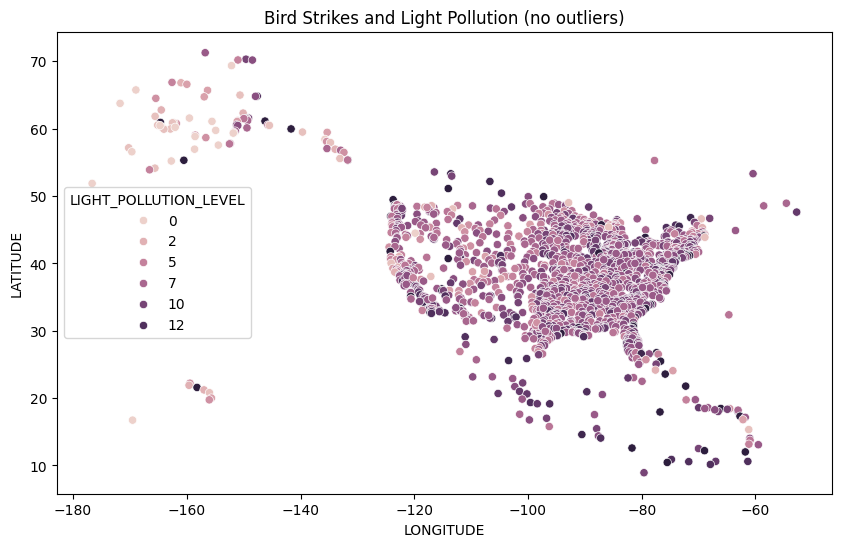

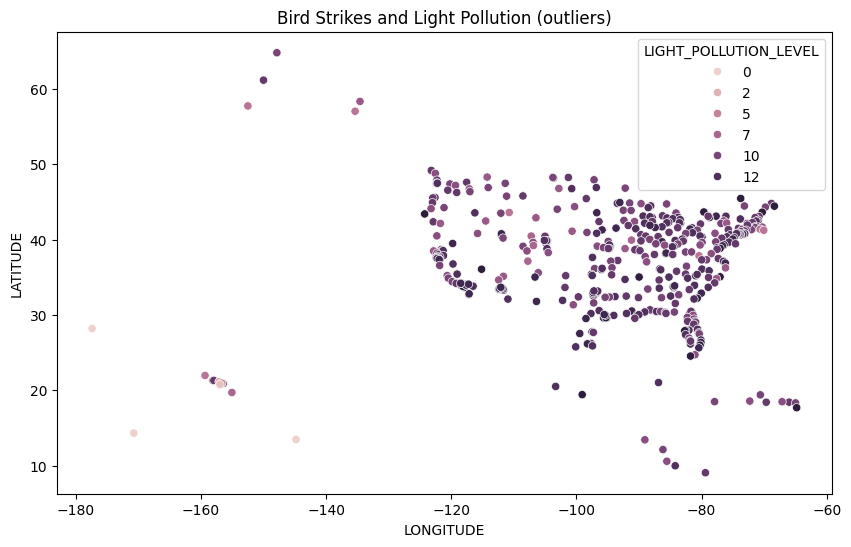

In [230]:
# Another scatter plot (all data)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_light_bird_df, x='LONGITUDE', y='LATITUDE', hue='LIGHT_POLLUTION_LEVEL')
plt.title('Bird Strikes and Light Pollution')
plt.show()

# Plot data with no outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=light_bird_df_without_outliers, x='LONGITUDE', y='LATITUDE', hue='LIGHT_POLLUTION_LEVEL')
plt.title('Bird Strikes and Light Pollution (no outliers)')
plt.show()

# Plot outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=light_bird_df_outliers, x='LONGITUDE', y='LATITUDE', hue='LIGHT_POLLUTION_LEVEL')
plt.title('Bird Strikes and Light Pollution (outliers)')
plt.show()